In [1]:
from ABC import ArtificialBeeColony
import numpy as np
from benchmark.functions import Sphere30d
import matplotlib.pyplot as plt
from tqdm import trange

In [3]:
N_BEES      = 100
LIMIT      = (N_BEES // 2) * 30 * 0.6
MAX_ITERS   = 500
N_simulations = 10
np.random.seed(1234)

In [4]:
# Simulations with Standard ABC
fitness_history_StandardABC = np.full((N_simulations,MAX_ITERS+1),np.nan)

for s in trange(N_simulations,desc='Simulations (Standard ABC):'):
    
    ABC = ArtificialBeeColony(n_bees = N_BEES,
                            limit    = LIMIT,
                            bounds   = Sphere30d.bounds,
                            function = Sphere30d.fun)
    ABC.optimize(max_iters=MAX_ITERS,selection='RouletteWheel',mutation='StandardABC',random_seed=None)

    fitness_history_StandardABC[s,:] = [best_bee.value for best_bee in ABC.optimal_bee_history]
    
means_StandardABC = np.mean(fitness_history_StandardABC,axis=0)
stds_StandardABC = np.std(fitness_history_StandardABC,axis=0)
lower_StandardABC = means_StandardABC - 1.96* stds_StandardABC/np.sqrt(N_simulations)
upper_StandardABC = means_StandardABC + 1.96* stds_StandardABC/np.sqrt(N_simulations)

Simulations (Standard ABC):: 100%|██████████| 10/10 [01:16<00:00,  7.63s/it]


In [5]:
# Simulations with ABC/best/1
fitness_history_ABCbest1 = np.full((N_simulations,MAX_ITERS+1),np.nan)

for s in trange(N_simulations,desc='Simulations (ABC with DE/best/1):'):
    
    ABC = ArtificialBeeColony(n_bees = N_BEES,
                            limit    = LIMIT,
                            bounds   = Sphere30d.bounds,
                            function = Sphere30d.fun)
    ABC.optimize(max_iters=MAX_ITERS,selection='RouletteWheel',mutation='ABC/best/1',random_seed=None)

    fitness_history_ABCbest1[s,:] = [best_bee.value for best_bee in ABC.optimal_bee_history]
    
means_ABCbest1 = np.mean(fitness_history_ABCbest1,axis=0)
stds_ABCbest1 = np.std(fitness_history_ABCbest1,axis=0)
lower_ABCbest1 = means_ABCbest1 - 1.96* stds_ABCbest1/np.sqrt(N_simulations)
upper_ABCbest1 = means_ABCbest1 + 1.96* stds_ABCbest1/np.sqrt(N_simulations)

Simulations (ABC with DE/best/1):: 100%|██████████| 10/10 [01:40<00:00, 10.09s/it]


In [6]:
# Simulations with ABC/best/2
fitness_history_ABCbest2 = np.full((N_simulations,MAX_ITERS+1),np.nan)

for s in trange(N_simulations,desc='Simulations (ABC with DE/best/2):'):
    
    ABC = ArtificialBeeColony(n_bees = N_BEES,
                            limit    = LIMIT,
                            bounds   = Sphere30d.bounds,
                            function = Sphere30d.fun)
    ABC.optimize(max_iters=MAX_ITERS,selection='RouletteWheel',mutation='ABC/best/2',random_seed=None)

    fitness_history_ABCbest2[s,:] = [best_bee.value for best_bee in ABC.optimal_bee_history]
    
means_ABCbest2 = np.mean(fitness_history_ABCbest2,axis=0)
stds_ABCbest2 = np.std(fitness_history_ABCbest2,axis=0)
lower_ABCbest2 = means_ABCbest2 - 1.96* stds_ABCbest2/np.sqrt(N_simulations)
upper_ABCbest2 = means_ABCbest2 + 1.96* stds_ABCbest2/np.sqrt(N_simulations)

Simulations (ABC with DE/best/2):: 100%|██████████| 10/10 [02:27<00:00, 14.74s/it]


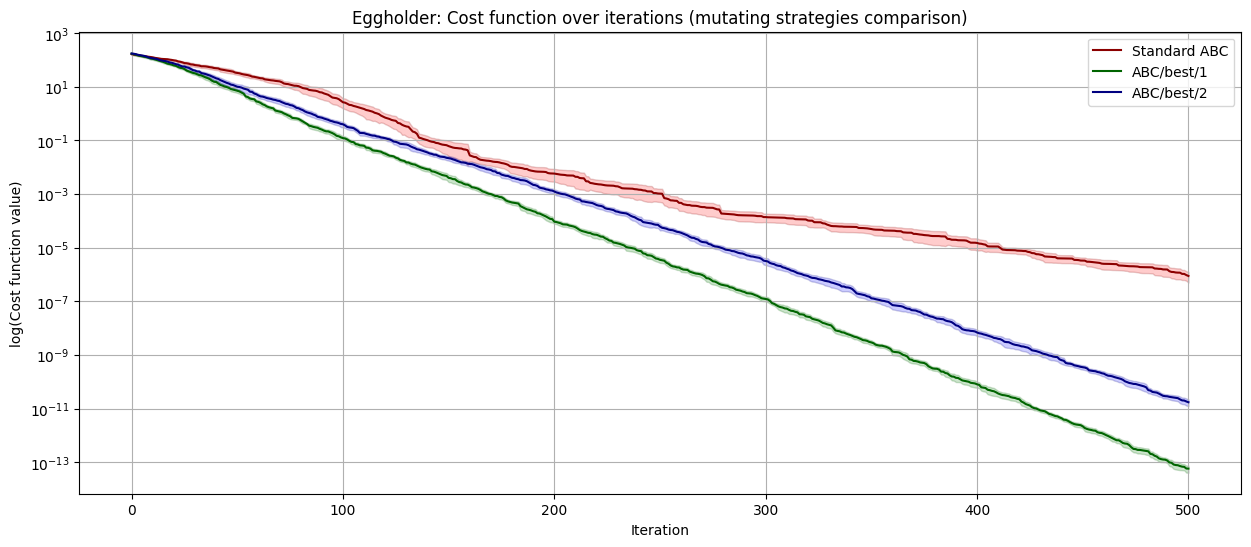

In [8]:
# Plotting the probabilistic series
plt.figure(figsize=(15, 6))
x = np.arange(MAX_ITERS+1)

plt.plot(x, means_StandardABC, label="Standard ABC", color="darkred")
plt.fill_between(x, lower_StandardABC, upper_StandardABC, color="red", alpha=0.2,edgecolor="darkred")

plt.plot(x, means_ABCbest1, label="ABC/best/1", color="darkgreen")
plt.fill_between(x, lower_ABCbest1, upper_ABCbest1, color="green", alpha=0.2,edgecolor="darkgreen")

plt.plot(x, means_ABCbest2, label="ABC/best/2", color="navy")
plt.fill_between(x, lower_ABCbest2, upper_ABCbest2, color="blue", alpha=0.2,edgecolor="navy")

plt.title(f"Eggholder: Cost function over iterations (mutating strategies comparison)")
plt.xlabel("Iteration")
plt.ylabel("log(Cost function value)")
plt.legend()
plt.grid(True)
plt.yscale("log")